## Coursework 3 example solutions

### Q1

#### Useful Reminders

##### Usual Units

- voltage across the membrane in *millivolts*, $V_\text{inside} - V_\text{outside}$. 
- current through the membrane in *nanoamperes*
- resistance across the membrane in *megaohms*
- conductance across the membrane in *microsiemens*
- capacitance across membrane *nanofarads*

##### Unit Relations

\begin{equation}
\begin{aligned}
\text{nA}
&=
\frac {\text{mV}} {\text{M}\Omega} 
=
\frac{\text{mV}\cdot\text{nF}}{\text{ms}}
\\
\text{mV}
&= 
\frac
{\text{nA} \cdot \text{ms}}{\text{nF}}
\\
{\text{M}\Omega}
&= 
\frac {\text{ms}} {\text{nF}} 
\\
\text{nF}
&= 
\text{ms} \cdot \text{M}\Omega 
\\
\end{aligned}
\end{equation}

##### Circuit laws

\begin{equation}
\begin{aligned}
V &= IR\\
C &= \frac {\mathrm dQ}{\mathrm dV}\\
I &= \frac {\mathrm dQ}{\mathrm dt}\\
\frac I C &= \frac{\mathrm dV}{\mathrm dt}\\
\end{aligned}
\end{equation}

/home/mer49/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Membrane capacitence 1.0 nF


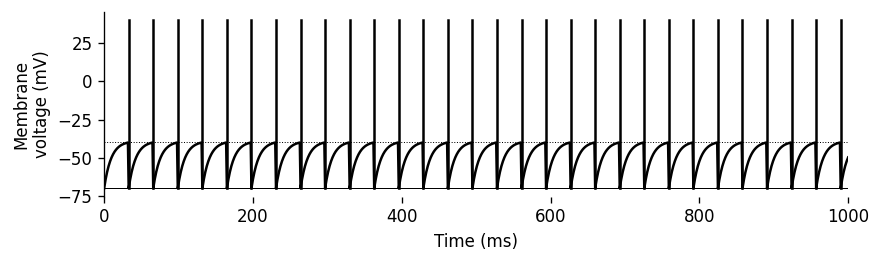

In [1]:
from pylab import *

T  = 1.0   # seconds to simulate
τm = 10.0  # ms membrane time constant τ=RC, so MΩ nF = ms; if Rm = 10 MΩ then we need Cm = 1nF
El = -70   # mV leak reversal potential
Vr = -70   # mV Reset voltage
Vt = -40   # mV threshold voltage
Rm = 10.0  # MΩ membrane resistance (1/g)
Ie = 3.1   # nA 
Δt = 1     # ms
Cm = τm/Rm # nF membrane capacitance
print("Membrane capacitence",Cm,"nF")

N = int(round(T*1000/Δt)) # Time bins to calculate
spike_times = [] # List to save spike times (can also use a raster)
v = zeros(N+1) # membrane voltage (more positive outside)
v[0] = Vr
for i in range(N):
    v[i+1] = v[i] + ( (El-v[i]) + Ie*Rm ) * (Δt/τm)
    if (v[i+1]>Vt):
        v[i+1] = Vr
        spike_times.append((i+1)*Δt)

figure(0,(8,2),120)
tt = arange(N+1)*Δt
plot(tt, v,color='k')

def paste_spikes(spike_times, color='k', Vs = 40):
    # It is common to paste "spikes" LIF voltage plots
    # Vs is the maximum spike voltage (mV)
    for t in spike_times:
        plot([t,t],[Vr,Vs],color=color)
paste_spikes(spike_times)

def simpleraxis():
    # Helper to hide axis and draw reset, threshold voltages
    gca().spines[['right', 'top', 'bottom']].set_visible(False)

def do_axes(Vt,Vr):
    simpleraxis()
    axhline(Vt,color='k',lw=0.6,linestyle=':',label='Threshold $V_t$')
    axhline(Vr,color='k',lw=0.6,linestyle='-',label='Reset $V_r$')
do_axes(Vt,Vr)

xlim(0,T*1000)
xlabel("Time (ms)")
ylabel("Membrane\nvoltage (mV)")

# Save for bonus step
v_euler = v.copy()
spike_times_euler = spike_times

#### Q1 Bonus

Forward exponential Euler finds a slower firing rate than Forward Euler. This is because Forward Euler approximates the voltage as a line. In this simulation, the subthreshold voltage solutions are concave (negative curvature), so this line is consitantly above the true solution (and excitatory/depolarizing bias). If you change $\Delta t$ to 0.05 and re-run the first two cells of this notebook, you will find these two solutions more similar. 



Steady state voltage target -39.0
  spike period ms: 34.33987204485146
    spike rate Hz: 29.120667621996244
numerical rate Hz: 28.0


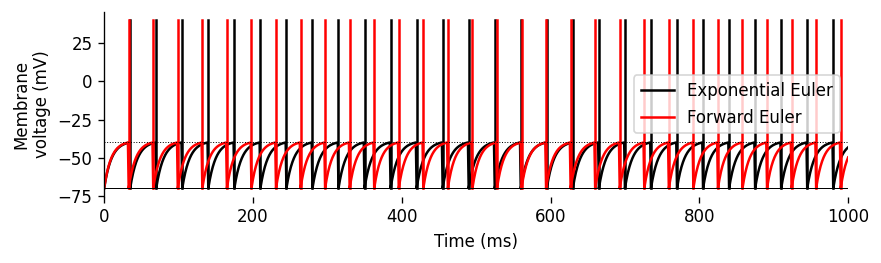

In [2]:
# Steady state voltage (mV)
# (constant for constant applied/synaptic currents)
# We set dv/dt to zero and solve to obtain this expression
# Note that it is above the spiking threshold
Vss = El + Ie*Rm
print("Steady state voltage target",Vss)

# Update weight;  We would need to recalculate this on each time 
# step if, for example, synaptic currents had creates a shorter 
# effective τm.
a = 1 - exp(-Δt/τm)

spike_times = [] # List to save spike times (can also use a raster)
v = zeros(N+1) # membrane voltage (more positive outside)
v[0] = Vr
for i in range(N):
    v[i+1] = v[i] + a*( Vss - v[i])
    if (v[i+1]>Vt):
        v[i+1] = Vr
        spike_times.append((i+1)*Δt)

figure(0,(8,2),120)
tt = arange(N+1)*Δt
plot(tt, v,color='k', label="Exponential Euler")
paste_spikes(spike_times,'k')
plot(tt, v_euler,color='r', label="Forward Euler")
paste_spikes(spike_times_euler,'r')
legend()
xlim(0,T*1000)
xlabel("Time (ms)")
ylabel("Membrane\nvoltage (mV)")
do_axes(Vt,Vr)

# Part 4
# To get the ISI voltage, we need to solve for the time when
# the voltage curve hits $V_t$, starting from $V_r$. 
# Solve for T in 
#     Vt = vss + exp(-T/tau)*(Vr - vss)
#     Vt - vss = exp(-T/tau)*(Vr - vss)
#     (Vt - vss)/(Vt - Vr) = exp(-T/tau)
#     ln[(Vt - vss)/(Vr - vss)] = -T/tau
#     -tau*ln[(Vt - vss)/(Vr - vss)] = T
spike_period = -τm*log((Vt - Vss)/(Vr - Vss))
spike_rate   = 1/spike_period
print("  spike period ms:",spike_period)
print("    spike rate Hz:",spike_rate*1000)
print("numerical rate Hz:",len(spike_times)/T)



### Q2

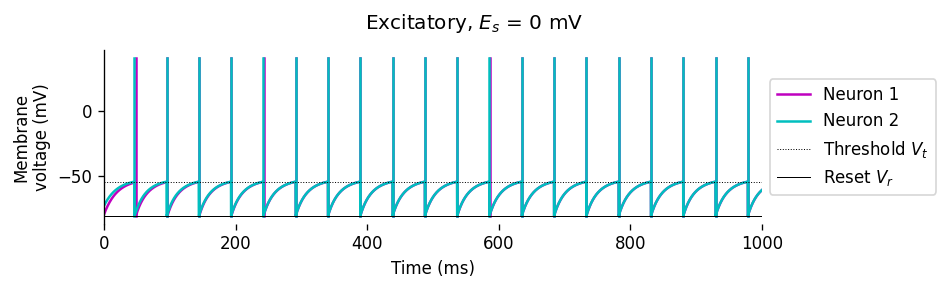

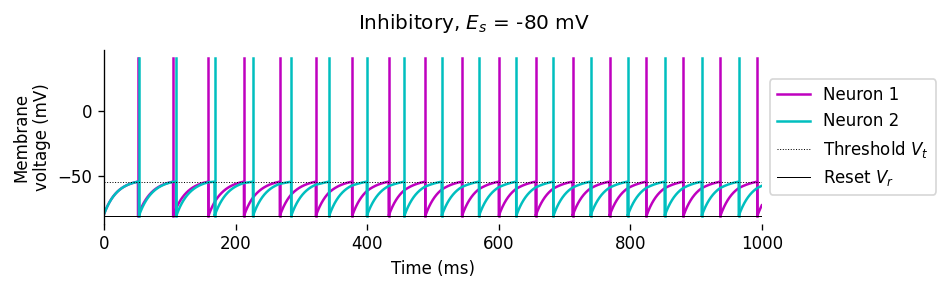

In [13]:
T  = 1.0      # seconds
τm = 20.0     # ms membrane time constant τ=RC, so MΩ nF = ms; if Rm = 10 MΩ then we need Cm = 1nF
El = -70      # mV leak reversal potential
Vr = -80      # mV Reset voltage
Vt = -54      # mV threshold voltage
Rm = 10.0     # MΩ membrane resistance (1/g)
Cm = τm/Rm    # nF membrane capacitance
Ie = 1.8      # nA
Δt = 0.1      # ms
GsRm = 0.15   # unitless
P    = 0.5    # unitless
τs   = 10     # ms
N    = int(round(T*1000/Δt))
tt   = arange(N+1)*Δt

# Note: implicitly passing other parameters via global scope
def simulate(Es=0,Ie=1.8,doplot=False,plotsyn=False):
    
    vv1 = zeros(N+1) # First neuron
    vv2 = zeros(N+1) # Second neuron
    sy1 = zeros(N+1) # First neuron synaptic conductance gate
    sy2 = zeros(N+1) # Second neuron synaptic conductance gate
    ss1 = [] # First neuron spike times
    ss2 = [] # Second neuron spike times

    # Random initial conditions for voltage
    vv1[0] = v1 = np.random.uniform(Vr,Vt)
    vv2[0] = v2 = np.random.uniform(Vr,Vt)
    s1 = s2 = 0

    # Forward Euler
    for i in range(N):
        dv1 = ( El-v1 + Ie*Rm + (Es-v1)*(GsRm*s1) )*(Δt/τm)
        dv2 = ( El-v2 + Ie*Rm + (Es-v2)*(GsRm*s2) )*(Δt/τm)
        v1 += dv1
        v2 += dv2
        s1 -= s1*(Δt/τs)
        s2 -= s2*(Δt/τs)
        if v1>Vt:
            s2 += P
            v1 = Vr
            ss1.append((i+1)*Δt)
        if v2>Vt:
            s1 += P
            v2 = Vr
            ss2.append((i+1)*Δt)
        vv1[i+1] = v1
        vv2[i+1] = v2
        sy1[i+1] = s1
        sy2[i+1] = s2
    
    if doplot or plotsyn:
        subplot(211)
        plot(tt,vv1,color='m',label='Neuron 1')
        paste_spikes(ss1,'m')
        plot(tt,vv2,color='c',label='Neuron 2')
        paste_spikes(ss2,'c')
        do_axes(Vt,Vr)
        legend(bbox_to_anchor=(1.0,0.5),loc='center left')
        xlim(0,T*1000)
        ylabel("Membrane\nvoltage (mV)")
        
        if not plotsyn:
            xlabel("Time (ms)")
        else:
            subplot(212)
            plot(tt,sy1,label='Synapse 1')
            plot(tt,sy2,label='Synapse 2')
            legend(bbox_to_anchor=(1.0,0.5),loc='center left')
            xlim(0,T*1000)
            ylim(0,ylim()[1])
            xlabel("Time (ms)")
            ylabel("Synaptic\nconductance \"$s$\"")
            do_axes(Vt,Vr)
        tight_layout()

    return len(ss1),len(ss2) # Used later


figure(0,(8,4),120)
Es = 0
simulate(Es=Es,doplot=True)
subplots_adjust(top=0.9)
suptitle("Excitatory, $E_s$ = %s mV"%Es)
gcf().align_labels()
show()

figure(1,(8,4),120)
Es = -80
simulate(Es=Es,doplot=True)
subplots_adjust(top=0.9)
suptitle("Inhibitory, $E_s$ = %s mV"%Es)
gcf().align_labels()
show()


#### Q2 Bonus

**Minimum current to reach threshold:** We need the steady-state voltage to just barely reach $V_t$ threshold. 
We can get this steady state by setting $\dot v_1 = 0$

$$
I_e R_m = V_t - E_l = -54 + 70 = 16 \text{ mV}
$$

$\tau_m = (R_m\text{ M}\Omega) \cdot  (C_m\text{ nF})= 20\text{ ms}$, and $R_m I_e = 18$ mV. 
Dividing by $R_m$ we get $I_\text{min} = 1.6 \text{ nA}$.

Simulate the neuron for 1 s for the input current with amplitude
  $I_e$ which is 0.1 [nA] lower than the minimum current computed
  above, and plot the voltage as a functions of time.

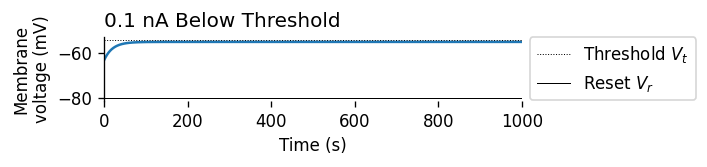

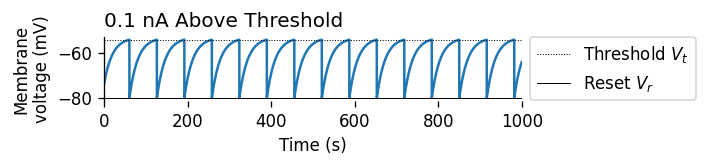

In [14]:
Ie_min = 1.6 # nA


# Note: implicitly passing other parameters via global scope
def simulate(Es=0,Ie=1.8,doplot=False):
    
    vv1 = zeros(N+1) # First neuron
    ss1 = [] # First neuron spike times

    # Random initial conditions for voltage
    vv1[0] = v1 = np.random.uniform(Vr,Vt)

    # Forward Euler
    for i in range(N):
        dv1 = ( El-v1 + Ie*Rm )*(Δt/τm)
        v1 += dv1
        if v1>Vt:
            v1 = Vr
            ss1.append(i*Δt)
        vv1[i+1] = v1
    
    if doplot:
        figure(0,(6,2),120)
        subplot(211)
        plot(tt,vv1)
        do_axes(Vt,Vr)
        legend(bbox_to_anchor=(1.0,0.5),loc='center left')
        xlim(0,T*1000)
        ylabel("Membrane\nvoltage (mV)")
        xlabel("Time (s)")
        tight_layout()

    return len(ss1) # Used later

# Verify that our threshold calculation looks ok
# Re using simulation 

# Below
simulate(Ie=Ie_min - 0.1,doplot=True)
subplots_adjust(top=0.9)
gcf().align_labels()
title("0.1 nA Below Threshold",loc='left')
show()

# Above
simulate(Ie=Ie_min + 0.1,doplot=True)
subplots_adjust(top=0.9)
gcf().align_labels()
title("0.1 nA Above Threshold",loc='left')
show()

Simulate the neuron for 1s for currents ranging from 2 [nA] to 5
  [nA] in steps of 0.1 [nA]. For each amplitude of current count the
  number of spikes produced, that is the firing rate. Plot the firing
  rate as the function of the input current.

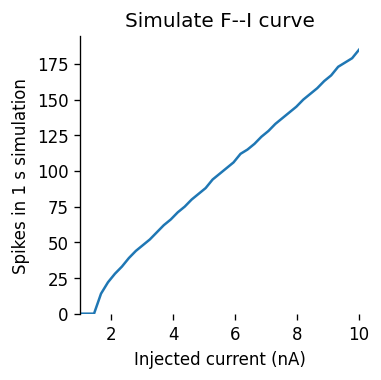

In [15]:
Es = 0
II = linspace(1,10,41)
nspikes = []
for Ie in II:
    nspikes.append(simulate(Es=Es,Ie=Ie))

figure(0,(3,3),120)
plot(II,nspikes)
xlim(II[0],II[-1])
ylim(0,ylim()[1])
xlabel("Injected current (nA)")
ylabel("Spikes in 1 s simulation")
title("Simulate F--I curve")
simpleraxis()

In [16]:
old = (II,nspikes)


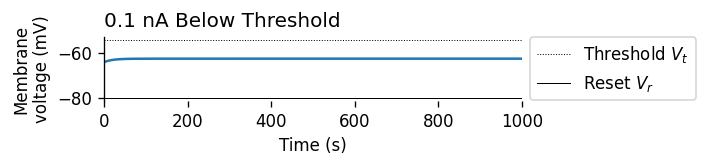

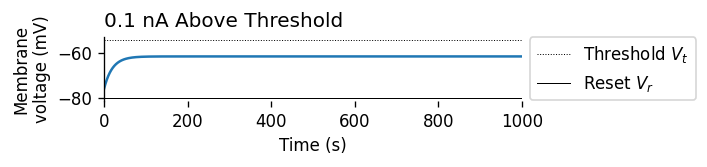

In [17]:
Ie_min = 1.6 # nA

Rm = 5.0     # MΩ membrane resistance (1/g)
Cm = τm/Rm    # nF membrane capacitance

# Note: implicitly passing other parameters via global scope
def simulate(Es=0,Ie=1.8,doplot=False):
    
    vv1 = zeros(N+1) # First neuron
    ss1 = [] # First neuron spike times

    # Random initial conditions for voltage
    vv1[0] = v1 = np.random.uniform(Vr,Vt)

    # Forward Euler
    for i in range(N):
        dv1 = ( El-v1 + Ie*Rm )*(Δt/τm)
        v1 += dv1
        if v1>Vt:
            v1 = Vr
            ss1.append(i*Δt)
        vv1[i+1] = v1
    
    if doplot:
        figure(0,(6,2),120)
        subplot(211)
        plot(tt,vv1)
        do_axes(Vt,Vr)
        legend(bbox_to_anchor=(1.0,0.5),loc='center left')
        xlim(0,T*1000)
        ylabel("Membrane\nvoltage (mV)")
        xlabel("Time (s)")
        tight_layout()

    return len(ss1) # Used later

# Verify that our threshold calculation looks ok
# Re using simulation 

# Below
simulate(Ie=Ie_min - 0.1,doplot=True)
subplots_adjust(top=0.9)
gcf().align_labels()
title("0.1 nA Below Threshold",loc='left')
show()

# Above
simulate(Ie=Ie_min + 0.1,doplot=True)
subplots_adjust(top=0.9)
gcf().align_labels()
title("0.1 nA Above Threshold",loc='left')
show()

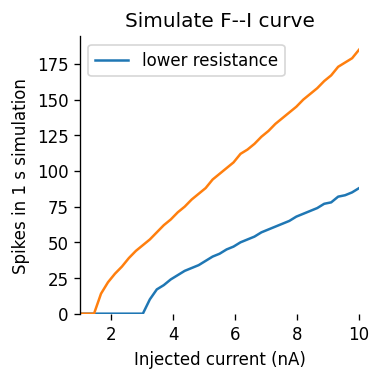

In [18]:
Es = 0
nspikes = []
for Ie in II:
    nspikes.append(simulate(Es=Es,Ie=Ie))

figure(0,(3,3),120)
plot(II,nspikes,label='lower resistance')
plot(*old)
xlim(II[0],II[-1])
ylim(0,ylim()[1])
xlabel("Injected current (nA)")
ylabel("Spikes in 1 s simulation")
title("Simulate F--I curve")
simpleraxis()
legend()